In [90]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from sklearn import metrics
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns


In [91]:
train_data = pd.read_csv('data/train.csv.zip', compression='zip')
test_data = pd.read_csv('data/test.csv.zip', compression='zip')
sample_submission_data = pd.read_csv("data/sample_submission.csv")

train_data.head()

,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,0,1,1,1,9238,1,1,126.0,1,1,...,0,6,7,6,12.428571,0,11.1,0.6,2.02,Graduate
1,1,1,17,1,9238,1,1,125.0,1,19,...,0,6,9,0,0.000000,0,11.1,0.6,2.02,Dropout
2,2,1,17,2,9254,1,1,137.0,1,3,...,0,6,0,0,0.000000,0,16.2,0.3,-0.92,Dropout
3,3,1,1,3,9500,1,1,131.0,1,19,...,0,8,11,7,12.820000,0,11.1,0.6,2.02,Enrolled
4,4,1,1,2,9500,1,1,132.0,1,19,...,0,7,12,6,12.933333,0,7.6,2.6,0.32,Graduate


In [92]:
label_encoder = LabelEncoder()
train_data['Target'] = label_encoder.fit_transform(train_data['Target'])
train_data = train_data.drop(['id'], axis=1)
train_data.drop_duplicates(inplace = True)
train_data.dropna(inplace = True)

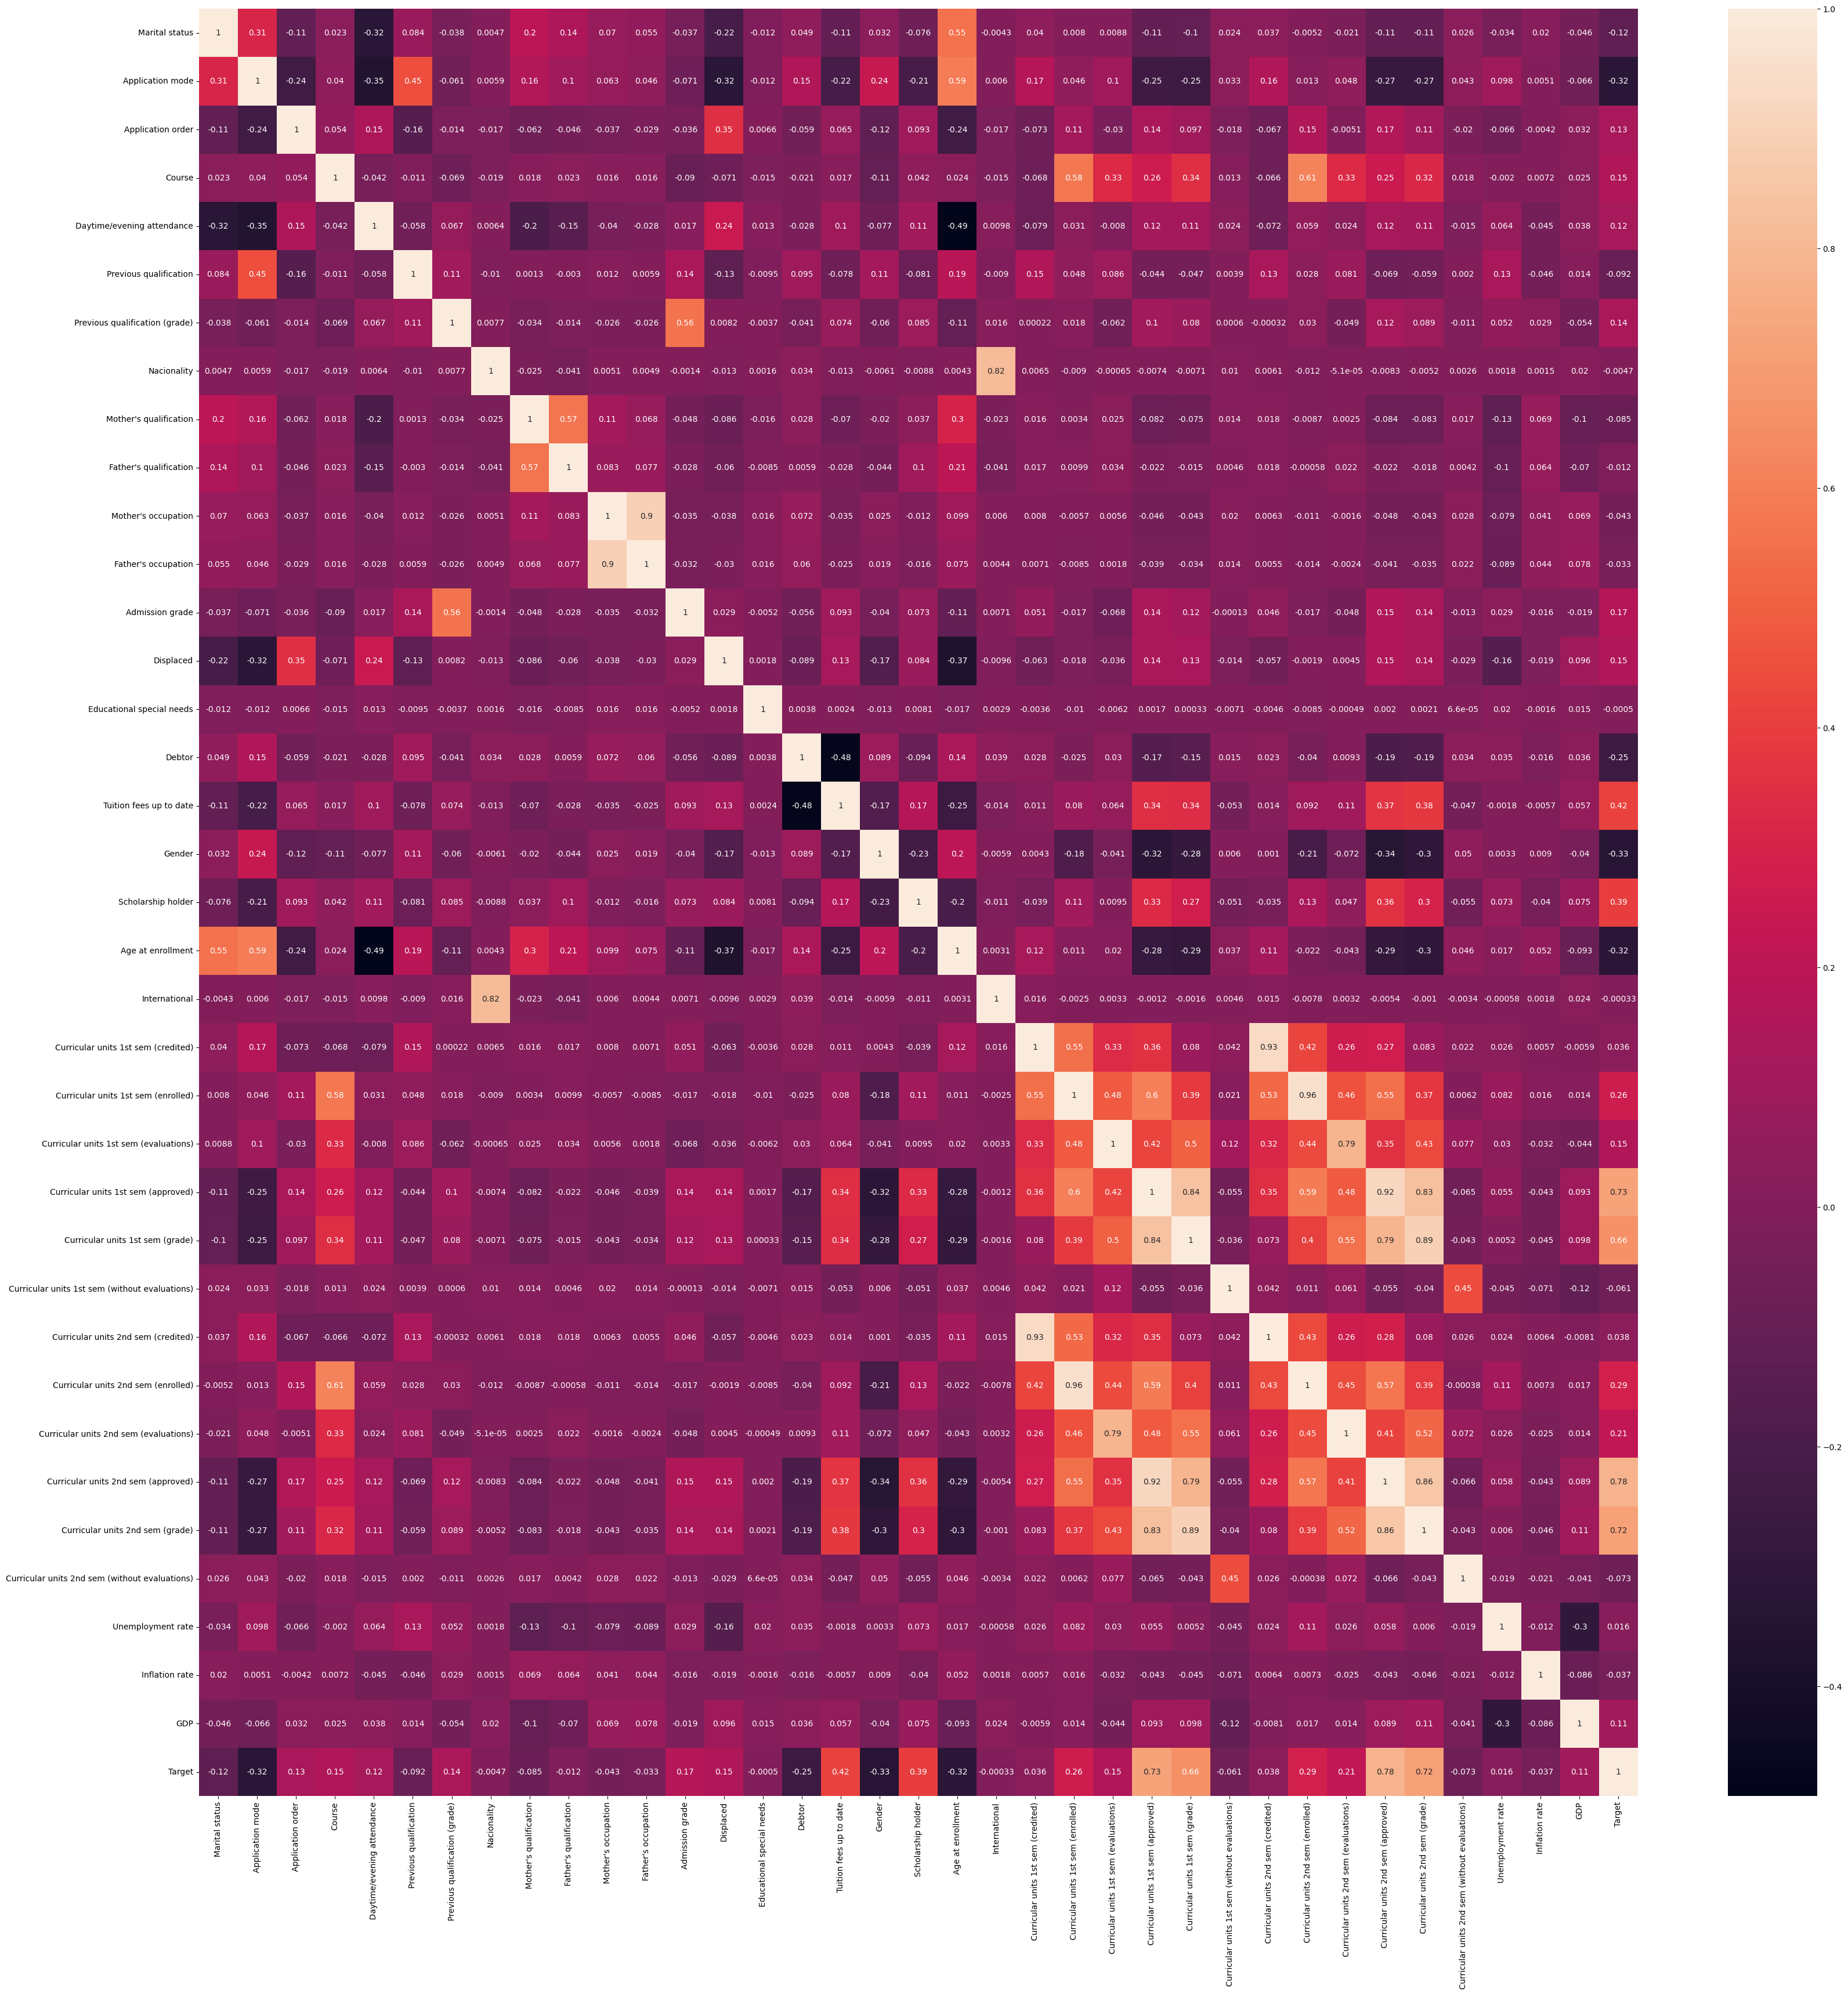

In [93]:
plt.figure(figsize=(40, 40))
sns.heatmap(train_data.corr(), annot=True)
plt.show()

In [94]:
train_data.drop(["Previous qualification", "Nacionality", "Mother's qualification", "Father's qualification", "Mother's occupation", 
         "Father's occupation", "Educational special needs", "International", "Curricular units 1st sem (credited)", 
         "Curricular units 1st sem (without evaluations)", "Curricular units 2nd sem (credited)", "Curricular units 2nd sem (grade)", 
         "Curricular units 2nd sem (without evaluations)", "Unemployment rate", "Inflation rate"], axis=1, inplace=True)
test_data.drop(["Previous qualification", "Nacionality", "Mother's qualification", "Father's qualification", "Mother's occupation", 
         "Father's occupation", "Educational special needs", "International", "Curricular units 1st sem (credited)", 
         "Curricular units 1st sem (without evaluations)", "Curricular units 2nd sem (credited)", "Curricular units 2nd sem (grade)", 
         "Curricular units 2nd sem (without evaluations)", "Unemployment rate", "Inflation rate"], axis=1, inplace=True)

In [95]:
data_train_targets = pd.DataFrame(train_data["Target"])
data_train_features = train_data.drop(columns = ["Target"])

print(train_data.shape)
test_data

(76518, 22)


,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification (grade),Admission grade,Displaced,Debtor,...,Scholarship holder,Age at enrollment,Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),GDP
0,76518,1,1,1,9500,1,141.0,152.1,0,0,...,0,18,7,0,0,0.000000,8,0,0,0.79
1,76519,1,1,1,9238,1,128.0,116.5,0,0,...,0,19,6,7,6,14.857143,6,6,6,2.02
2,76520,1,1,1,9238,1,118.0,114.2,0,0,...,1,18,6,11,6,12.000000,6,11,5,-4.06
3,76521,1,44,1,9147,1,130.0,130.0,0,0,...,1,23,6,15,5,11.500000,8,14,5,3.51
4,76522,1,39,1,9670,1,110.0,106.0,1,0,...,0,26,6,9,3,11.000000,6,9,4,0.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51007,127525,1,1,2,171,1,128.0,124.7,1,0,...,0,19,0,0,0,0.000000,0,0,0,-4.06
51008,127526,2,39,1,9119,1,133.1,140.0,0,1,...,0,33,5,6,0,0.000000,5,5,0,-3.12
51009,127527,1,1,1,171,1,127.0,120.4,0,1,...,0,20,0,0,0,0.000000,0,0,0,-4.06
51010,127528,1,1,3,9773,1,132.0,126.3,1,1,...,0,18,6,8,5,12.600000,6,9,3,0.32


In [96]:
train_data

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification (grade),Admission grade,Displaced,Debtor,Tuition fees up to date,...,Age at enrollment,Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),GDP,Target
0,1,1,1,9238,1,126.0,122.6,0,0,1,...,18,6,6,6,14.500000,6,7,6,2.02,2
1,1,17,1,9238,1,125.0,119.8,1,0,1,...,18,6,8,4,11.600000,6,9,0,2.02,0
2,1,17,2,9254,1,137.0,144.7,0,0,1,...,18,6,0,0,0.000000,6,0,0,-0.92,0
3,1,1,3,9500,1,131.0,126.1,1,0,1,...,18,7,9,7,12.591250,8,11,7,2.02,1
4,1,1,2,9500,1,132.0,120.1,1,0,1,...,18,7,12,6,12.933333,7,12,6,0.32,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76513,1,17,1,9254,1,121.0,116.5,1,0,1,...,18,6,9,6,10.666667,6,8,5,0.79,2
76514,1,1,6,9254,1,125.0,131.6,1,0,1,...,19,6,22,4,13.000000,6,9,6,-3.12,2
76515,5,17,1,9085,1,138.0,123.3,1,0,1,...,19,5,13,4,12.500000,5,8,5,-3.12,1
76516,1,1,3,9070,1,136.0,124.8,1,0,1,...,18,6,0,0,0.000000,6,0,0,0.32,0


In [98]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
# using pca to extract the features


pca = PCA(n_components=10)
scaler = StandardScaler()

pipeline = Pipeline([('scaler', scaler), ('pca', pca)])
X_scaled_pca = pipeline.fit_transform(data_train_features)



In [99]:
X_train,X_test,y_train,y_test = train_test_split( data_train_features, data_train_targets, test_size=0.10)
y_train=y_train.values.ravel()

In [100]:
X_test

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification (grade),Admission grade,Displaced,Debtor,Tuition fees up to date,...,Scholarship holder,Age at enrollment,Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),GDP
65246,1,17,1,9500,1,124.0,119.3,0,0,1,...,0,19,8,11,7,13.867143,8,11,7,1.74
29728,1,7,1,9070,1,140.0,140.0,0,0,1,...,0,31,6,6,6,12.666667,6,6,6,-0.92
63364,1,1,1,9773,1,138.0,123.3,0,0,1,...,0,18,6,8,6,12.857143,6,9,5,-4.06
27856,1,17,3,9500,1,141.0,127.8,1,0,1,...,0,18,8,8,8,12.933750,8,8,8,-3.12
44397,1,17,3,9853,1,118.0,110.7,1,0,1,...,0,19,6,13,3,13.333333,6,14,2,-4.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71671,2,7,1,8014,0,130.0,130.0,0,0,1,...,0,33,6,9,5,12.000000,6,8,5,0.32
8492,1,17,1,9500,1,143.0,129.9,0,0,1,...,1,20,7,7,7,13.914286,8,8,8,-0.92
66582,1,1,1,9085,1,124.0,117.4,1,0,1,...,1,20,5,8,4,10.750000,5,9,5,1.74
34414,1,1,1,9119,1,150.0,132.5,1,0,1,...,0,18,5,7,3,12.000000,5,9,4,0.32


In [104]:
test_data = test_data.drop(['id'], axis=1)


In [105]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
rf_classifier = RandomForestClassifier(n_estimators=340, max_depth=27)
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)
y_test_pred=rf_classifier.predict(test_data)


In [107]:
print('accuracy_score:', accuracy_score(y_test, y_pred))
# For multi-class classification, use 'macro', 'micro', or 'weighted' average:
print('precision_score (micro):', precision_score(y_test, y_pred, average='micro'))
print('recall_score (micro):', recall_score(y_test, y_pred, average='micro'))
print('f1_score (micro):', f1_score(y_test, y_pred, average='micro'))
print('confusion_matrix:\n', confusion_matrix(y_test, y_pred))

accuracy_score: 0.8191322530057501
precision_score (micro): 0.8191322530057501
recall_score (micro): 0.8191322530057501
f1_score (micro): 0.8191322530057501
confusion_matrix:
 [[2074  286  183]
 [ 185  887  451]
 [  54  225 3307]]


In [108]:
y_pred = rf_classifier.predict(test_data)

In [109]:
# Create the submission DataFrame
submission = pd.DataFrame({
    'id': sample_submission_data['id'],  # Ensure the 'id' column matches the sample submission
    'Target': label_encoder.inverse_transform(y_pred)  # Inverse transform if necessary
})

# Save the submission file
submission.to_csv('submission.csv', index=False)

print("Submission file created: submission.csv")

Submission file created: submission.csv
